# Расчёт полей тороидально намагниченного цилиндра в опыте Дейны         (опыт Николаева номер 31)

А.Ю.Дроздов

С.А. Дейна в ролике "Магниты Второе магнитное поле Николаева 4" https://www.youtube.com/watch?v=A2Lx-ONcMow (Текстовое писание ролика https://drive.google.com/file/d/0B-MmD2EU7WEbV3VCR0NvLXl6Rm8/view) представил опыт с взаимодействием двух соосно расположенных цилиндров со сверлением, тороидально намагничиваемых путём пропускания тока по проводу проходящему внутри сверлений.

Сама идея этого опыта принадлежит Г.Николаеву, который утверждал, что притяжения цилиндров противоречит классической электродинамике и для обьяснения притяжения цилиндров постулировал существование продольной силы Николаева, кроме традиционной силы Лоренца

В данной же работе, пользуясь матаппаратом классической электродинамики, я представляю расчёт полей тороидально намагниченного цилиндра, а также вычисляю силу их взаимодействия: силу Лоренца и силу Николаева. 

Вводим цилиндрическую систему координат, в которой (вслед за Таммом) индексом $j$ обозначаем координаты молекулярных токов намагниченного цилиндра, а индексом $a$ обозначаем координаты точек наблюдения

In [1]:
zj = var("zj")
za = var("za")
rj = var("rj")
ra = var("ra")
phi = var("phi")

assume(rj>0)
assume(ra>0)

Введём переменные - пределы интегрирования по координатам молекулярных токов

In [2]:
zj1 = var("zj1") # левый торец цилиндра
zj2 = var("zj2") # правый торец цилиндра

rj1 = var("rj1") # радиус внутренней поверхности (сверления) цилиндра
rj2 = var("rj2") # радиус внешней цилиндрической поверхности цилиндра

Задаём размеры цилиндров в сантиметрах. Размеры цилиндров: диаметр 30 мм, длина 30 мм, диаметр внутреннего сверления 6 мм.

In [3]:
# sizes of cylinders in Deyna's video
Zj1 = -1.5
Zj2 =  1.5
Rj1 = 0.3
Rj2 = 1.5

Ra1 = Rj1
Ra2 = Rj2

DZ = Zj2 - Zj1

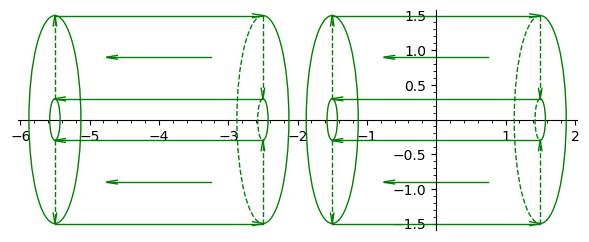

In [4]:
line_thick = 0.005
arr_l = 0.15
arr_h = 0.025
color = "green"

def draw_cylinder(z0 = 0):
    p  = line ([[z0 + Zj1,      Rj2                 ], [z0 + Zj2,Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,Rj2+arr_h           ], [z0 + Zj2,Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,Rj2-arr_h-line_thick], [z0 + Zj2,Rj2-line_thick]], color = color)

    p += line ([[z0 + Zj2,      Rj2                 ], [z0 + Zj2,Rj1]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj2-arr_h,Rj1+arr_l           ], [z0 + Zj2,Rj1]], color = color)
    p += line ([[z0 + Zj2+arr_h,Rj1+arr_l           ], [z0 + Zj2,Rj1]], color = color)

    p += line ([[z0 + Zj2,      Rj1                 ], [z0 + Zj1,Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,Rj1+arr_h           ], [z0 + Zj1,Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,Rj1-arr_h-line_thick], [z0 + Zj1,Rj1-line_thick]], color = color)

    p += line ([[z0 + Zj1,      Rj1                 ], [z0 + Zj1,Rj2]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj1-arr_h,Rj2-arr_l           ], [z0 + Zj1,Rj2]], color = color)
    p += line ([[z0 + Zj1+arr_h,Rj2-arr_l           ], [z0 + Zj1,Rj2]], color = color)

    p += line ([[z0 + Zj2-DZ/4,      (Rj1+Rj2)/2                 ], [z0 + Zj1+DZ/4,(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,(Rj1+Rj2)/2+arr_h           ], [z0 + Zj1+DZ/4,(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,(Rj1+Rj2)/2-arr_h-line_thick], [z0 + Zj1+DZ/4,(Rj1+Rj2)/2-line_thick]], color = color)
    
    
    p += line ([[z0 + Zj1,      -Rj2                 ], [z0 + Zj2,-Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,-Rj2+arr_h           ], [z0 + Zj2,-Rj2]], color = color)
    p += line ([[z0 + Zj2-arr_l,-Rj2-arr_h-line_thick], [z0 + Zj2,-Rj2-line_thick]], color = color)

    p += line ([[z0 + Zj2,      -Rj2                 ], [z0 + Zj2,-Rj1]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj2-arr_h,-Rj1-arr_l           ], [z0 + Zj2,-Rj1]], color = color)
    p += line ([[z0 + Zj2+arr_h,-Rj1-arr_l           ], [z0 + Zj2,-Rj1]], color = color)


    p += line ([[z0 + Zj2,      -Rj1                 ], [z0 + Zj1,-Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,-Rj1+arr_h           ], [z0 + Zj1,-Rj1]], color = color)
    p += line ([[z0 + Zj1+arr_l,-Rj1-arr_h-line_thick], [z0 + Zj1,-Rj1-line_thick]], color = color)

    p += line ([[z0 + Zj1,      -Rj1                 ], [z0 + Zj1,-Rj2]], color = color, linestyle="dashed")
    p += line ([[z0 + Zj1-arr_h,-Rj2+arr_l           ], [z0 + Zj1,-Rj2]], color = color)
    p += line ([[z0 + Zj1+arr_h,-Rj2+arr_l           ], [z0 + Zj1,-Rj2]], color = color)

    p += line ([[z0 + Zj2-DZ/4,      -(Rj1+Rj2)/2                 ], [z0 + Zj1+DZ/4,-(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,-(Rj1+Rj2)/2+arr_h           ], [z0 + Zj1+DZ/4,-(Rj1+Rj2)/2]], color = color)
    p += line ([[z0 + Zj1+DZ/4+arr_l,-(Rj1+Rj2)/2-arr_h-line_thick], [z0 + Zj1+DZ/4,-(Rj1+Rj2)/2-line_thick]], color = color)

    p += ellipse((z0 + Zj1, 0), (Rj1)/4, (Rj1), color = color)
    p += ellipse((z0 + Zj1, 0), (Rj2)/4, (Rj2), color = color)

    p += arc((z0 + Zj2, 0), (Rj1)/4, (Rj1), sector=(-pi/2,pi/2), color = color)
    p += arc((z0 + Zj2, 0), (Rj2)/4, (Rj2), sector=(-pi/2,pi/2), color = "green")

    p += arc((z0 + Zj2, 0), (Rj1)/4, (Rj1), sector=(pi/2,3*pi/2), color = color, linestyle="dashed")
    p += arc((z0 + Zj2, 0), (Rj2)/4, (Rj2), sector=(pi/2,3*pi/2), color = color, linestyle="dashed")
    
    return p

p = draw_cylinder()
p += draw_cylinder(z0 = -DZ-1.0)
p.show(aspect_ratio = 1, axes=True)

Следуя Тамму, обозначаем вектор намагниченности цилиндра через $I$. 
В данном расчёте предположим, что цилиндр имеет только $\varphi$-тую компоненту намагниченности и величина этой намагниченности постоянна в объёме ($I_{\varphi} = const$).

Для поверхностного тока у Тамма можно почерпнуть формулу $js = c \cdot [I \times n]$ (параграф 61. Векторный потенциал магнитного поля при наличии магнентиков. Средняя плотность объёмных и поверхностных токов. Уравнение 61.10 - случай для вакуума)
Для объёмного тока - формулу $jv = c \cdot rot(I)$ (там же, уравнение 61.9)

В работе http://liquidcrystalosmos.narod.ru/deyna_cylinders_nikolaevs_experiment_31.htm было показано, что при равномерной тороидальной намагниченности цилиндра средняя плотность объёмных токов в данной конфигурации имеет только лишь $z$ компоненту, которая по модулю обратно пропорциональна радиус координате цилиндрической системы.

К этому же выводу можно прийти взяв ротор от $I$ при условии $I_{\varphi} = const$ в цилиндрических координатах

In [5]:
c = var("c")         # скорость света
I0 = var("I0")       # намагниченность
js(r) = c * I0       # плотность поверхностного тока на внутренней и внешней цилиндрической поверхностях цилиндра
                     # js(rj1) = - c * I0
                     # js(rj2) = + c * I0
jt(r) = c * I0       # плотность поверхностного тока на торцах цилиндра
                     # jt(zj1) = + c * I0
                     # jt(zj2) = - c * I0
jv(r) = - c * I0 / r # плотность объёмного тока

In [6]:
z_j = var("z_j")
z_a = var("z_a")
r_j = var("r_j")
r_a = var("r_a")
I_0 = var("I_0")  # намагниченность

latex_subs = [I0 == I_0, ra==r_a, za==z_a, zj==z_j, rj==r_j]

Зная среднюю плотность объёмных и поверхностных токов можно вычислить векторный потенциал магнитного поля тороидально намагниченного цилиндра. Следуя Тамму

$\vec{A}=\frac{1}{c}\int{\frac{\vec{j_v}}{R}}d{V}+\frac{1}{c}\int{\frac{\vec{j_s}}{R}}d{S}$

Распишем в этом интеграле отдельно интегрирование по торцам и по цилиндрическим поверхностям

$\vec{A}=\frac{1}{c}\int{\frac{\vec{j_v}}{R}}d{V}+\frac{1}{c}\int{\frac{\vec{j_s}}{R}}d{S_{s}}+\frac{1}{c}\int{\frac{\vec{j_t}}{R}}d{S_{t}}$

В цилиндрической системе координат интегрирование по объёму цилиндра

$A_V=\frac{1}{c}\int{\frac{j_v}{R}}d{V}=\frac{1}{c}\int\limits_{{{r}_{j}}}\int\limits_{{{\varphi}_{j}}}\int\limits_{{{z}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{z}_{j}}d{{\varphi }_{j}}d{{r}_{j}}$

интегрирование по цилиндрическим поверхностям цилиндра

$A_S=\frac{1}{c}\int{\frac{j_s}{R}}d{S_{s}}=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}\int\limits_{{{z}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{z}_{j}}d{{\varphi }_{j}}$

интегрирование по торцевым поверхностям цилиндра

$A_T=\frac{1}{c}\int{\frac{j_t}{R}}d{S_{t}}=\frac{1}{c}\int\limits_{{{r}_{j}}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ } cos \left({\varphi }_{j}\right) d{{\varphi }_{j}}d{{r}_{j}}$

Во всех этих трёх интегралах нам потребуются интегралы $\int\limits_{0}^{2\pi}{\frac{1}{R}}d{\varphi}$ - обратного расстояния между точкой истока и точкой наблюдения в цилиндрической системе координат, проинтегрированный по координатному углу phi точек истока от нуля до $2\pi$ и $\int\limits_{0}^{2\pi}{\frac{cos\left(\varphi\right)}{R}}d{\varphi} = 0$

$R=\sqrt{(r_j\,sin(\varphi_j)-r_a\,sin(\varphi_a))^2+(r_j\,cos(\varphi_j)-r_a\,cos(\varphi_a))^2+(z_j-z_a)^2}$

Ввиду цилиндрической симметрии и ввиду того что

$\frac{\partial A}{\partial \varphi_a} = 0$

нам не потребуется дифференцирование векторного потенциала по $\varphi_a$ координате точек наблюдения, можно упростить расчёт полагая, что $\varphi_a = 0$, тогда 

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

В таком случае интеграл 
$IRphi=\int\limits_{0}^{2\pi}{\frac{1}{R}}d{\varphi_j}$
выражается через полный эллиптический интеграл первого рода следующим образом:

In [7]:
from IPython.display import display, Math, Latex

rja2 = (rj-ra)^2+(zj-za)^2
module = - 4*rj*ra / rja2
IRphi=4*elliptic_kc(module) / sqrt(rja2)
display(Math("$$IR_{\\varphi} =" + latex(IRphi.subs(latex_subs)) + "$$"))

<IPython.core.display.Math object>

In [8]:
z_j1 = var("z_j1") # левый торец цилиндра
z_j2 = var("z_j2") # правый торец цилиндра

r_j1 = var("r_j1") # радиус внутренней поверхности (сверления) цилиндра
r_j2 = var("r_j2") # радиус внешней цилиндрической поверхности цилиндра

latex_subs += [zj1 == z_j1, zj2==z_j2, rj1==r_j1, rj2==r_j2]

вспомогательные переменные для интегрирования источников векторного потенциала по поверхностным и объёмным токам

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементарным объёмом ${{r}_{j}}\,d{{\varphi}_{j}}d{r_j}d{z_j}$ цилиндра

$A_v=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi}_{j}}$

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементом площади ${{r}_{j}}\,d{{\varphi}_{j}}d{z_j}$ цилиндрической поверхности цилиндра

$A_s=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi}_{j}}$

Интеграл по ${\varphi}_{j}$ векторного потенциала, создаваемого элементом площади ${{r}_{j}}\,d{{\varphi}_{j}}d{r_j}$  торцевой поверхности цилиндра

$A_t=\frac{1}{c}\int\limits_{{{\varphi}_{j}}}{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ } cos \left({\varphi }_{j}\right) d{{\varphi }_{j}}$

In [9]:
As=IRphi*js(rj)*rj/c
display(Math("$$A_s =" + latex(As.subs(latex_subs)) + "$$"))

At=0
display(Math("$$A_t =" + latex(At.subs(latex_subs)) + "$$"))

Av=IRphi*jv(rj)*rj/c
display(Math("$$A_v =" + latex(Av.subs(latex_subs)) + "$$"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого торцевым поверхностным током, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_t = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [14]:
At_diff_za_ = lambda I0, r_j, r_a, z_j, z_a: 0

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током, заключённом в плоском кольце толщиной $dr_j$ с радиусом $r_j$, по $z_a$ координате точки наблюдения

In [15]:
display(Math("$$\\frac{\\partial}{\\partial z_a} A_t(I_0, rj, ra, zj, za) = " + latex(At_diff_za_(I0, rj, ra, zj, za).subs(latex_subs)) + "$$"))

<IPython.core.display.Math object>

In [18]:
exec(preparse("At_diff_za = lambda I0, rj, ra, zj, za : " + str(At_diff_za_(I0, rj, ra, zj, za))))

In [19]:
print (At_diff_za (I0, rj, ra, zj, za))

0


In [20]:
display(Math(latex(At_diff_za (I0, rj, ra, zj, za).subs(latex_subs))))

<IPython.core.display.Math object>

Учитывая положительное направление поверхностного тока в левом торце и отрицательное направление поверхностного тока в правом торце составим сумму полученной производной для обоих торцов

In [21]:
At2_diff_za_ = lambda I0, rj, ra, zj1, zj2, za : At_diff_za_(I0, rj, ra, zj1, za) - At_diff_za_(I0, rj, ra, zj2, za)

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током обоих торцов, заключённом в двух плоских кольцах толщиной $dr_{j}$ и радиуса $r_{j}$, по $z$ координате точки наблюдения

In [22]:
exec(preparse("At2_diff_za = lambda I0, rj, ra, zj1, zj2, za : " + str(At2_diff_za_(I0, rj, ra, zj1, zj2, za))))

In [23]:
print(At2_diff_za (I0, rj, ra, zj1, zj2, za))

0


In [24]:
display(Math(latex(At2_diff_za (I0, rj, ra, zj1, zj2, za).subs(latex_subs))))

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого торцевым поверхностным током, по $r_a$ координате точки наблюдения $\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_t\right) = \frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,\int\limits_{{{\varphi}_{j}}}
{\frac{j_t \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}\right)$

In [25]:
At_ra_diff_ra_div_ra_ = lambda I0, r_j, r_a, z_j, z_a : ((ra*At).diff(ra)/ra).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j)

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током, заключённом в плоском кольце толщиной $dr_j$ с радиусом $r_j$, по $r_a$ координате точки наблюдения

In [26]:
display(Math("$$\\frac{1}{r_a}\\frac{\\partial}{\\partial r_a}\\left(r_a\\, A_t(I_0, rj, ra, zj, za)\\right) = " + latex(At_ra_diff_ra_div_ra_(I0, rj, ra, zj, za).subs(latex_subs)) + "$$"))

<IPython.core.display.Math object>

In [27]:
exec(preparse("At_ra_diff_ra_div_ra = lambda I0, rj, ra, zj, za : " + str(At_ra_diff_ra_div_ra_(I0, rj, ra, zj, za))))

In [28]:
print (At_ra_diff_ra_div_ra (I0, rj, ra, zj, za))

0


In [29]:
display(Math(latex(At_ra_diff_ra_div_ra (I0, rj, ra, zj, za).subs(latex_subs))))

<IPython.core.display.Math object>

Учитывая положительное направление поверхностного тока в левом торце и отрицательное направление поверхностного тока в правом торце составим сумму полученной производной для обоих торцов

In [30]:
At2_ra_diff_ra_div_ra_ = lambda I0, rj, ra, zj1, zj2, za : At_ra_diff_ra_div_ra_(I0, rj, ra, zj1, za) - At_ra_diff_ra_div_ra_(I0, rj, ra, zj2, za)

In [31]:
#str(At2_ra_diff_ra_div_ra_(I0, rj, ra, zj1, zj2, za))

Итак, производная векторного потенциала, создаваемого торцевым поверхностным током обоих торцов, заключённом в двух плоских кольцах толщиной $dr_{j}$ и радиуса $r_{j}$, по $r$ координате точки наблюдения

In [32]:
exec(preparse("At2_ra_diff_ra_div_ra = lambda I0, rj, ra, zj1, zj2, za : " + str(At2_ra_diff_ra_div_ra_(I0, rj, ra, zj1, zj2, za))))

In [33]:
print(At2_ra_diff_ra_div_ra (I0, rj, ra, zj1, zj2, za))

0


In [34]:
display(Math(latex(At2_ra_diff_ra_div_ra (I0, rj, ra, zj1, zj2, za).subs(latex_subs))))

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого поверхностным током цилиндрической поверхности, по $r_a$ координате точки наблюдения $\frac{\partial}{\partial r_a} A_s = \frac{\partial}{\partial r_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [35]:
As_diff_ra_ = lambda I0, r_j, r_a, z_j, z_a : (As.diff(ra)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j)

Итак, производная векторного потенциала, создаваемого поверхностным током цилиндрической поверхности радиуса $r_{j}$, заключённой в поверхностном кольце шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

In [36]:
display(Math("$$\\frac{\\partial}{\\partial r_a} A_s (I0, rj, ra, zj, za) = " + latex(As_diff_ra_(I0, rj, ra, zj, za).subs(latex_subs)) + "$$"))

<IPython.core.display.Math object>

In [37]:
exec(preparse("As_diff_ra = lambda I0, rj, ra, zj, za : " + str(As_diff_ra_(I0, rj, ra, zj, za))))

In [38]:
print(As_diff_ra (I0, rj, ra, zj, za))

-4*I0*(ra - rj)*rj*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 2*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*I0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))


In [39]:
display(Math(latex(As_diff_ra (I0, rj, ra, zj, za).subs(latex_subs))))

<IPython.core.display.Math object>

Учитывая отрицательное направление поверхностного тока на внутренней цилиндрической поверхности (в сверлении) и положительное направление поверхностного тока на внешней цилиндрической поверхности составим сумму полученной производной для обоих цилиндрических поверхностей

In [40]:
As2_diff_ra_ = lambda I0, rj1, rj2, ra, zj, za : - As_diff_ra_(I0, rj1, ra, zj, za) + As_diff_ra_(I0, rj2, ra, zj, za)


Итак, производная векторного потенциала, создаваемого поверхностными токами обоих цилиндрических поверхностей, заключённом в двух поверхностных кольцах шириной $dz_{j}$ c координатой $z_{j}$, по $r$ координате точки наблюдения

In [41]:
exec(preparse("As2_diff_ra = lambda I0, rj1, rj2, ra, zj, za : " + str(As2_diff_ra_(I0, rj1, rj2, ra, zj, za))))

In [42]:
print (As2_diff_ra (I0, rj1, rj2, ra, zj, za))

4*I0*(ra - rj1)*rj1*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/((ra - rj1)^2 + (za - zj)^2)^(3/2) - 4*I0*(ra - rj2)*rj2*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/((ra - rj2)^2 + (za - zj)^2)^(3/2) - 2*sqrt((ra - rj1)^2 + (za - zj)^2)*((4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))*I0*(2*(ra - rj1)*ra*rj1/((ra - rj1)^2 + (za - zj)^2)^2 - rj1/((ra - rj1)^2 + (za - zj)^2))/(ra*(4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)) + 2*sqrt((ra - rj2)^2 + (za - zj)^2)*((4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)))*I0*(2*(ra - rj2)*ra*rj2/((ra - rj2)^2 + (za - zj)^2)^2 - rj2/((ra - rj2)^2 + (za - zj)^2))/(ra*(4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1))


In [43]:
display(Math(latex(As2_diff_ra (I0, rj1, rj2, ra, zj, za).subs(latex_subs))))

<IPython.core.display.Math object>

Рассчитаем производную векторного потенциала, создаваемого поверхностным током цилиндрической поверхности, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_s = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_s \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [44]:
As_diff_za_ = lambda I0, r_j, r_a, z_j, z_a : (As.diff(za)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j)

Итак, производная векторного потенциала, создаваемого поверхностным током цилиндрической поверхности радиуса $r_{j}$, заключённой в поверхностном кольце шириной $dz_{j}$ c координатой $z_{j}$, по $z$ координате точки наблюдения

In [45]:
display(Math("$$\\frac{\\partial}{\\partial z_a} A_s (I0, rj, ra, zj, za) = " + latex(As_diff_za_(I0, rj, ra, zj, za).subs(latex_subs)) + "$$"))

<IPython.core.display.Math object>

In [46]:
exec(preparse("As_diff_za = lambda I0, rj, ra, zj, za : " + str(As_diff_za_(I0, rj, ra, zj, za))))

In [47]:
print(As_diff_za (I0, rj, ra, zj, za))

-4*I0*rj*(za - zj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) + 4*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*I0*rj*(za - zj)/(((ra - rj)^2 + (za - zj)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))


In [48]:
display(Math(latex(As_diff_za (I0, rj, ra, zj, za).subs(latex_subs))))

<IPython.core.display.Math object>

Учитывая отрицательное направление поверхностного тока на внутренней цилиндрической поверхности (в сверлении) и положительное направление поверхностного тока на внешней цилиндрической поверхности составим сумму полученной производной для обоих цилиндрических поверхностей

In [49]:
As2_diff_za_ = lambda I0, rj1, rj2, ra, zj, za : - As_diff_za_(I0, rj1, ra, zj, za) + As_diff_za_(I0, rj2, ra, zj, za)


Итак, производная векторного потенциала, создаваемого поверхностными токами обоих цилиндрических поверхностей, заключённом в двух поверхностных кольцах шириной $dz_{j}$ c координатой $z_{j}$, по $z$ координате точки наблюдения

In [50]:
exec(preparse("As2_diff_za = lambda I0, rj1, rj2, ra, zj, za : " + str(As2_diff_za_(I0, rj1, rj2, ra, zj, za))))

In [51]:
print (As2_diff_za (I0, rj1, rj2, ra, zj, za))

4*I0*rj1*(za - zj)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2))/((ra - rj1)^2 + (za - zj)^2)^(3/2) - 4*I0*rj2*(za - zj)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2))/((ra - rj2)^2 + (za - zj)^2)^(3/2) - 4*((4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj1/((ra - rj1)^2 + (za - zj)^2)))*I0*rj1*(za - zj)/(((ra - rj1)^2 + (za - zj)^2)^(3/2)*(4*ra*rj1/((ra - rj1)^2 + (za - zj)^2) + 1)) + 4*((4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj2/((ra - rj2)^2 + (za - zj)^2)))*I0*rj2*(za - zj)/(((ra - rj2)^2 + (za - zj)^2)^(3/2)*(4*ra*rj2/((ra - rj2)^2 + (za - zj)^2) + 1))


In [52]:
display(Math(latex(As2_diff_za (I0, rj1, rj2, ra, zj, za).subs(latex_subs))))

<IPython.core.display.Math object>

Теперь необходимо составить производную векторного потенциала, создаваемого объёмным током поверхности, по $r_a$ координате точки наблюдения $\frac{\partial}{\partial r_a} A_v = \frac{\partial}{\partial r_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [53]:
Av_diff_ra_ = lambda I0, r_j, r_a, z_j, z_a : (Av.diff(ra)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j)


Итак, производная векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_{j}$ c координатой $z_{j}$ и толщиной $dr_{j}$ и радиуса $r_j$, по $r$ координате точки наблюдения

In [54]:
display(Math("$$\\frac{\\partial}{\\partial r_a} A_v (I0, rj, ra, zj, za) =" + latex(Av_diff_ra_(I0, rj, ra, zj, za).subs(latex_subs)) + "$$"))

<IPython.core.display.Math object>

In [55]:
exec(preparse("Av_diff_ra = lambda I0, rj, ra, zj, za : " + str(Av_diff_ra_(I0, rj, ra, zj, za))))

In [56]:
print (Av_diff_ra (I0, rj, ra, zj, za))

4*I0*(ra - rj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) - 2*sqrt((ra - rj)^2 + (za - zj)^2)*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*I0*(2*(ra - rj)*ra*rj/((ra - rj)^2 + (za - zj)^2)^2 - rj/((ra - rj)^2 + (za - zj)^2))/(ra*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*rj)


In [57]:
display(Math(latex(Av_diff_ra (I0, rj, ra, zj, za).subs(latex_subs))))

<IPython.core.display.Math object>

Теперь необходимо составить производную векторного потенциала, создаваемого объёмным током поверхности, по $z_a$ координате точки наблюдения $\frac{\partial}{\partial z_a} A_v = \frac{\partial}{\partial z_a}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}$

In [58]:
Av_diff_za_ = lambda I0, r_j, r_a, z_j, z_a : (Av.diff(za)).substitute(ra==r_a).substitute(za==z_a).substitute(zj==z_j).substitute(rj==r_j)


Итак, производная векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_{j}$ c координатой $z_{j}$ и толщиной $dr_{j}$ и радиуса $r_j$, по $z$ координате точки наблюдения

In [59]:
display(Math("$$\\frac{\\partial}{\\partial z_a} A_v (I0, rj, ra, zj, za) =" + latex(Av_diff_za_(I0, rj, ra, zj, za).subs(latex_subs)) + "$$"))

<IPython.core.display.Math object>

In [60]:
exec(preparse("Av_diff_za = lambda I0, rj, ra, zj, za : " + str(Av_diff_za_(I0, rj, ra, zj, za))))

In [61]:
print (Av_diff_za (I0, rj, ra, zj, za))

4*I0*(za - zj)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2))/((ra - rj)^2 + (za - zj)^2)^(3/2) - 4*((4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1)*elliptic_kc(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)) - elliptic_ec(-4*ra*rj/((ra - rj)^2 + (za - zj)^2)))*I0*(za - zj)/(((ra - rj)^2 + (za - zj)^2)^(3/2)*(4*ra*rj/((ra - rj)^2 + (za - zj)^2) + 1))


In [62]:
display(Math(latex(Av_diff_za (I0, rj, ra, zj, za).subs(latex_subs))))

<IPython.core.display.Math object>

Далее нам необходимо определить собственную функцию для численного интегрирования

In [63]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

        integral = numerical_integral(f, a, b)

        print ("integral = ", integral)

        result = integral[0]
        print ("result = ", result)
        return result


Теперь необходимо производную векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_j$ c координатой $z_j$ и толщиной $dr_j$ и радиуса $r_j$, по $r$ координате точки наблюдения - проинтегрировать по радиусу точек истока от $r_{j1}$ до $r_{j2}$

$\frac{\partial}{\partial r_a}\int\limits_{r_{j1}}^{r_{j2}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

In [64]:
AV_diff_ra = lambda I0, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra(I0, rj, ra, zj, za), rj1, rj2)

Теперь необходимо производную векторного потенциала, создаваемого объёмным током, заключённом в объёмном кольце шириной $dz_j$ c координатой $z_j$ и толщиной $dr_j$ и радиуса $r_j$, по $z$ координате точки наблюдения - проинтегрировать по радиусу точек истока от $r_{j1}$ до $r_{j2}$

$\frac{\partial}{\partial z_a}\int\limits_{r_{j1}}^{r_{j2}}\int\limits_{{{\varphi}_{j}}}
{\frac{j_v \left( {{r}_{j}} \right){{r}_{j}}}{R}\ }d{{\varphi }_{j}}d{{r}_{j}}$

In [65]:
AV_diff_za = lambda I0, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_za(I0, rj, ra, zj, za), rj1, rj2)

Производим подстановку размеров координат правого цилиндра - источника векторного потенциала в формулы производных векторного потенциала

In [66]:
At_diff_za_subs_zj = lambda rj, ra, za : At2_diff_za(1, rj, ra, Zj1, Zj2, za)

In [67]:
At_ra_diff_ra_div_ra_subs_zj = lambda rj, ra, za : At2_ra_diff_ra_div_ra (1, rj, ra, Zj1, Zj2, za)

In [68]:
As_diff_ra_subs_rj = lambda ra, zj, za : As2_diff_ra(1, Rj1, Rj2, ra, zj, za)

In [69]:
As_diff_za_subs_rj = lambda ra, zj, za : As2_diff_za(1, Rj1, Rj2, ra, zj, za)

In [70]:
Av_diff_ra_subs_rj = lambda ra, zj, za : AV_diff_ra (1, Rj1, Rj2, ra, zj, za)

In [71]:
Av_diff_za_subs_rj = lambda ra, zj, za : AV_diff_za (1, Rj1, Rj2, ra, zj, za)

Определяем функцию расчёта векторного магнитного поля $H$ (компонента $\varphi$)

$H_{\varphi}=\frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

In [81]:
def calc_H_phi(Za, Ra):
    At_diff_za_subs_zj_za_ra = lambda rj : At_diff_za_subs_zj(rj, Ra, Za)
    As_diff_ra_subs_rj_za_ra = lambda zj : As_diff_ra_subs_rj(Ra, zj, Za)

    At_diff_za_num_int = [0] #At_diff_za_subs_zj_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_num_int = As_diff_ra_subs_rj_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_num_int = num_int( lambda zj : Av_diff_ra_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_num_int = As_diff_ra_num_int[0] + Av_diff_ra_num_int

    H_phi_t = At_diff_za_num_int[0]
    H_phi_sv = - As_v_diff_ra_num_int

    H_phi = H_phi_t + H_phi_sv
    print ("Ra =", Ra, "Za =", Za, "H_phi_t =", H_phi_t)
    print ("Ra =", Ra, "Za =", Za, "H_phi_sv =", H_phi_sv)
    print ("Ra =", Ra, "Za =", Za, "H_phi =", H_phi)

    return (H_phi, H_phi_t, H_phi_sv)

Определяем функцию расчёта скалярного магнитного поля $H_{||} = -\,div\,\vec{A}$

$H_{||}=-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right) - \frac{\partial}{\partial z_a}(A_S+A_V)$

In [82]:
def calc_H_scalar(Za, Ra):
    At_ra_diff_ra_div_ra_subs_zj_za_ra = lambda rj : At_ra_diff_ra_div_ra_subs_zj(rj, Ra, Za)
    As_diff_za_subs_rj_za_ra = lambda zj : As_diff_za_subs_rj(Ra, zj, Za)

    At_ra_diff_ra_div_ra_num_int = [0] #At_ra_diff_ra_div_ra_subs_zj_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_za_num_int = As_diff_za_subs_rj_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_za_num_int = num_int( lambda zj : Av_diff_za_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_za_num_int = As_diff_za_num_int[0] + Av_diff_za_num_int

    H_scalar_t = - At_ra_diff_ra_div_ra_num_int[0]
    H_scalar_sv = - As_v_diff_za_num_int

    H_scalar = H_scalar_t + H_scalar_sv
    print ("Ra =", Ra, "Za =", Za, "H_scalar_t =", H_scalar_t)
    print ("Ra =", Ra, "Za =", Za, "H_scalar_sv =", H_scalar_sv)
    print ("Ra =", Ra, "Za =", Za, "H_scalar =", H_scalar)

    return (H_scalar, H_scalar_t, H_scalar_sv)

Запуск расчёта величины магнитного поля $H_{\varphi}$ для заданного набора значений зазора между цилиндрами

In [83]:
plot_data_h_phi = []
plot_data_h_phi_t = []
plot_data_h_phi_sv = []

Ra = Rj2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_phi = calc_H_phi(Za, Ra)
    plot_data_h_phi += [(Za, h_phi[0])]
    plot_data_h_phi_t += [(Za, h_phi[1])]
    plot_data_h_phi_sv += [(Za, h_phi[2])]

Ra = 1.50000000000000 Za = -1.51000000000000 H_phi_t = 0
Ra = 1.50000000000000 Za = -1.51000000000000 H_phi_sv = -2.9899345929719905
Ra = 1.50000000000000 Za = -1.51000000000000 H_phi = -2.9899345929719905
Ra = 1.50000000000000 Za = -1.52000000000000 H_phi_t = 0
Ra = 1.50000000000000 Za = -1.52000000000000 H_phi_sv = -2.9394656438900277
Ra = 1.50000000000000 Za = -1.52000000000000 H_phi = -2.9394656438900277
Ra = 1.50000000000000 Za = -1.53000000000000 H_phi_t = 0
Ra = 1.50000000000000 Za = -1.53000000000000 H_phi_sv = -2.89261975922246
Ra = 1.50000000000000 Za = -1.53000000000000 H_phi = -2.89261975922246
Ra = 1.50000000000000 Za = -1.54000000000000 H_phi_t = 0
Ra = 1.50000000000000 Za = -1.54000000000000 H_phi_sv = -2.8481756268238803
Ra = 1.50000000000000 Za = -1.54000000000000 H_phi = -2.8481756268238803
Ra = 1.50000000000000 Za = -1.55000000000000 H_phi_t = 0
Ra = 1.50000000000000 Za = -1.55000000000000 H_phi_sv = -2.805553875665859
Ra = 1.50000000000000 Za = -1.55000000000000 H_p

Результирующий график scalar магнитного поля $H_{\varphi}$ на расстоянии Ra = 1.5 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

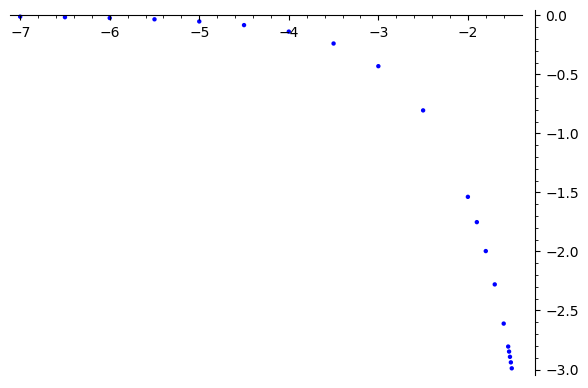

In [84]:
list_plot(plot_data_h_phi).show()

In [ ]:
plot_data_h_phi = []
plot_data_h_phi_t = []
plot_data_h_phi_sv = []

Ra = Rj1
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_phi = calc_H_phi(Za, Ra)
    plot_data_h_phi += [(Za, h_phi[0])]
    plot_data_h_phi_t += [(Za, h_phi[1])]
    plot_data_h_phi_sv += [(Za, h_phi[2])]

Результирующий график scalar магнитного поля $H_{\varphi}$ на расстоянии Ra = 0.3 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

In [ ]:
list_plot(plot_data_h_phi).show()

In [ ]:
plot_data_h_phi = []
plot_data_h_phi_t = []
plot_data_h_phi_sv = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_phi = calc_H_phi(Za, Ra)
    plot_data_h_phi += [(Za, h_phi[0])]
    plot_data_h_phi_t += [(Za, h_phi[1])]
    plot_data_h_phi_sv += [(Za, h_phi[2])]

Результирующий график scalar магнитного поля $H_{\varphi}$ на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

In [ ]:
list_plot(plot_data_h_phi).show()

Запуск расчёта величины scalar магнитного поля для заданного набора значений зазора между цилиндрами

In [ ]:
plot_data_h_scalar = []
plot_data_h_scalar_t = []
plot_data_h_scalar_sv = []

Ra = Rj2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_scalar = calc_H_scalar(Za, Ra)
    plot_data_h_scalar += [(Za, h_scalar[0])]
    plot_data_h_scalar_t += [(Za, h_scalar[1])]
    plot_data_h_scalar_sv += [(Za, h_scalar[2])]

Результирующий график scalar магнитного поля $H_{||}$ на расстоянии Ra = 1.5 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

In [ ]:
list_plot(plot_data_h_scalar).show()

In [ ]:
plot_data_h_scalar = []
plot_data_h_scalar_t = []
plot_data_h_scalar_sv = []

Ra = Rj1
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_scalar = calc_H_scalar(Za, Ra)
    plot_data_h_scalar += [(Za, h_scalar[0])]
    plot_data_h_scalar_t += [(Za, h_scalar[1])]
    plot_data_h_scalar_sv += [(Za, h_scalar[2])]

Результирующий график scalar магнитного поля $H_{||}$ на расстоянии Ra = 0.3 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

In [ ]:
list_plot(plot_data_h_scalar).show()

In [ ]:
plot_data_h_scalar = []
plot_data_h_scalar_t = []
plot_data_h_scalar_sv = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5):
    Za = Zj1 - dz
    h_scalar = calc_H_scalar(Za, Ra)
    plot_data_h_scalar += [(Za, h_scalar[0])]
    plot_data_h_scalar_t += [(Za, h_scalar[1])]
    plot_data_h_scalar_sv += [(Za, h_scalar[2])]

Результирующий график scalar магнитного поля $H_{||}$ на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

In [ ]:
list_plot(plot_data_h_scalar).show()

Определяем функцию расчёта поперечной силы Лоренца (компонента $z$), действующей на торец другого цилиндра с координатой $Z_a$
удельная плотность силы Лоренца
$$f=\frac{1}{c}[j \times H]$$
поскольку в образовании результирующей силы участвуют только торцевые токи, берём поверхностный интеграл по площади поверхности торца
$$F=\frac{1}{c}\int\limits_{S_a}[j_t \times H]\,d{S_a}$$
в цилиндрической системе координат интеграл по площади торца
$$F=\frac{1}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{0}^{2\pi}[j_t \times H]\,r_a\,d{\varphi_a}\,d{r_a}$$
упрощая
$$F=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, H_{\varphi}\,r_a\,d{r_a}$$

где компонента $\varphi$ векторного магнитного поля $H_{\varphi} = \left(rot\,\vec{A}\right)_{\varphi}$

$H_{\varphi} = \frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

Раскладывая выражение для магнитного поля на слагаемые можно вычислить три компоненты силы Лоренца 

$$F_T =\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, \left(\frac{\partial}{\partial z_a}A_T\right)\,r_a\,d{r_a}$$

$$F_S=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, \left(- \frac{\partial}{\partial r_a}A_S\right)\,r_a\,d{r_a}$$

$$F_V=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\,j_t\, \left(- \frac{\partial}{\partial r_a}A_V\right)\,r_a\,d{r_a}$$

Исходя из извесной формулы векторного анализа 

$$[\vec{j} \times rot\,\vec{A}] = \nabla\left(\vec{j}\cdot\vec{A}\right) - \left(\vec{j},\nabla\right)\vec{A}$$

легко понять что:

компонента силы Лоренца $F_T$ носит потенциальный характер

а компоненты силы Лоренца $F_S$ и $F_V$ носят конвективный характер

In [ ]:
def calc_F_lorenz(Za, Ra1, Ra2):
    At_diff_za_subs_zj_za = lambda rj, ra : At_diff_za_subs_zj(rj, ra, Za)
    As_diff_ra_subs_rj_za = lambda ra, zj : As_diff_ra_subs_rj(ra, zj, Za)
    Av_diff_ra_subs_rj_za = lambda ra, zj : Av_diff_ra_subs_rj(ra, zj, Za)

    jt_c(r) = (jt(r)/c).substitute(I0 == 1)

    At_diff_za_num_int_ra = lambda Rj : num_int(lambda ra : (2*pi*jt_c(ra)*ra*At_diff_za_subs_zj_za(Rj, ra)), Ra1, Ra2)
    At_diff_za_num_int_ra_int_rj = num_int(lambda rj : At_diff_za_num_int_ra(rj), Rj1, Rj2)

    As_diff_ra_num_int_ra = lambda Zj : num_int(lambda ra : (2*pi*jt_c(ra)*ra*(As_diff_ra_subs_rj_za(ra, Zj) ) ), Ra1, Ra2)
    As_diff_ra_num_int_ra_int_zj = num_int(lambda zj : As_diff_ra_num_int_ra(zj), Zj1, Zj2)

    Av_diff_ra_num_int_ra = lambda Zj : num_int(lambda ra : (2*pi*jt_c(ra)*ra*(Av_diff_ra_subs_rj_za(ra, Zj) ) ), Ra1, Ra2)
    Av_diff_ra_num_int_ra_int_zj = num_int(lambda zj : Av_diff_ra_num_int_ra(zj), Zj1, Zj2)

    F_z_t = At_diff_za_num_int_ra_int_rj
    F_z_s = - As_diff_ra_num_int_ra_int_zj
    F_z_v = - Av_diff_ra_num_int_ra_int_zj

    F_z = F_z_t + F_z_s + F_z_v

    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_t  =", F_z_t)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_s  =", F_z_s)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z_v  =", F_z_v)
    print ("Ra1 =", Ra1, "Ra2 =", Ra2, "Za =", Za, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта поперечной Лоренца (компонента $z$), действующей на левый цилиндр исходя из величины зазора $dz$

In [ ]:
def calc_F_lorenz_cylinder(dz):
    # расчет силы Лоренца, действующей на ближайжий (правый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - dz
    F_lorenz_left_cylinder_right_t = calc_F_lorenz(Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_right_t = ", F_lorenz_left_cylinder_right_t)

    # расчет силы Лоренца, действующей на удалённый (левый) торец пробного цилиндра расположенного левее на расстоянии
    Za = Zj1 - DZ - dz
    F_lorenz_left_cylinder_left_t = calc_F_lorenz(Za, Ra1, Ra2)
    print ("Za = ", Za, "F_lorenz_left_cylinder_left_t =", F_lorenz_left_cylinder_left_t)

    # учитывая отрицательное направление торцевого тока в правом торце и положительное направление торцевого тока в левом торце
    # находим суммарную силу Лоренца действующую на левый цилиндр
    F_lorenz_cylinder = - F_lorenz_left_cylinder_right_t[0] + F_lorenz_left_cylinder_left_t[0]
    print ("dz = ", dz, "F_lorenz_cylinder = ", F_lorenz_cylinder)

    F_lorenz_cylinder_potential = - F_lorenz_left_cylinder_right_t[1] + F_lorenz_left_cylinder_left_t[1]
    print ("dz = ", dz, "F_lorenz_cylinder_potential = ", F_lorenz_cylinder_potential)

    F_lorenz_cylinder_convective = - F_lorenz_left_cylinder_right_t[2] + F_lorenz_left_cylinder_left_t[2] \
                                   - F_lorenz_left_cylinder_right_t[3] + F_lorenz_left_cylinder_left_t[3]
    print ("dz = ", dz, "F_lorenz_cylinder_convective = ", F_lorenz_cylinder_convective)

    return (F_lorenz_cylinder, F_lorenz_cylinder_potential, F_lorenz_cylinder_convective)



Определяем функцию расчёта силы Николаева (компонента $z$), действующей на поверхность другого цилиндра с координатой $R_a$
удельная плотность силы Николаева
$$f=\frac{1}{c}\left(j \, H_{||}\right)$$

поскольку в образовании результирующей силы участвуют surface токи, берём поверхностный интеграл по площади поверхности surface
$$F=\frac{1}{c}\int\limits_{S_a}\left(j \, H_{||}\right)\,d{S_a}$$
в цилиндрической системе координат интеграл по площади surface
$$F=\frac{1}{c}\int\limits_{z_{a1}}^{z_{a2}}\int\limits_{0}^{2\pi}\left(j \, H_{||}\right)\,R_a\,d{\varphi_a}\,d{z_a}$$
упрощая
$$F=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, H_{||}\,d{z_a}$$

где скалярное магнитное поле $H_{||} = -\,div\,\vec{A}$

$H_{||}=-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right) - \frac{\partial}{\partial z_a}(A_S+A_V)$

Раскладывая выражение для скалярного магнитного поля на слагаемые можно вычислить три компоненты силы Николаева

$$F_T=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, \left(-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right)\right)\,d{z_a}$$

$$F_S=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, \left(-\frac{\partial}{\partial z_a}A_S\right)\,d{z_a}$$

$$F_V=\frac{2\pi\,R_a}{c}\int\limits_{z_{a1}}^{z_{a2}}\,j_s\, \left(-\frac{\partial}{\partial z_a}A_V\right)\,d{z_a}$$

Анализируя выражения для $F_S$ и $F_V$ можно заметить что они суть градиент потенциальной функции (50.8) взаимодействия токов согласно Тамм, Основы теории электричества, 1957, параграф 51 "Пондемоторное взаимодействие токов", с единственным отличием полученных здесь формул Николаева от формул Тамма - знак 

Таким образом компоненты силы Николаева $F_S$ и $F_V$ носят потенциальный характер. 

Анализируя выражения для $F_T$ можно заметить что по своему физическому смыслу она похожа на приложенную к рельсам продольную силу "отдачи рельсотрона" http://liquidcrystalosmos.narod.ru/railgun.htm существование которой отвергается в теории классической электродинамики 

Таким образом компонента силы Николаева $F_T$ носит конвективный характер и её существование под сомнением

In [ ]:
def calc_F_nikolaev_int_on_surf(Ra, Za1, Za2):
    # integration on surface of the left cylinder
    At_ra_diff_ra_div_ra_subs_zj_ra = lambda rj, za : At_ra_diff_ra_div_ra_subs_zj(rj, Ra, za)
    As_diff_za_subs_rj_ra = lambda zj, za : As_diff_za_subs_rj(Ra, zj, za)
    Av_diff_za_subs_rj_ra = lambda zj, za : Av_diff_za_subs_rj(Ra, zj, za)
    
    js_c(r) = (js(r)/c).substitute(I0 == 1)

    At_diff_ra_num_int_za = lambda Rj : num_int(lambda za : (2*pi*js_c(Ra)*Ra*At_ra_diff_ra_div_ra_subs_zj_ra(Rj, za)), Za1, Za2)
    At_diff_ra_num_int_za_int_rj = num_int(lambda rj : At_diff_ra_num_int_za(rj), Rj1, Rj2)

    As_diff_za_num_int_za = lambda Zj : num_int(lambda za : (2*pi*js_c(Ra)*Ra*(As_diff_za_subs_rj_ra(Zj, za) ) ), Za1, Za2)
    As_diff_za_num_int_za_int_zj = num_int(lambda zj : As_diff_za_num_int_za(zj), Zj1, Zj2)

    Av_diff_za_num_int_za = lambda Zj : num_int(lambda za : (2*pi*js_c(Ra)*Ra*(Av_diff_za_subs_rj_ra(Zj, za) ) ), Za1, Za2)
    Av_diff_za_num_int_za_int_zj = num_int(lambda zj : Av_diff_za_num_int_za(zj), Zj1, Zj2)

    F_z_t = - At_diff_ra_num_int_za_int_rj
    F_z_s = - As_diff_za_num_int_za_int_zj
    F_z_v = - Av_diff_za_num_int_za_int_zj

    F_z = F_z_t + F_z_s + F_z_v

    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z_t  =", F_z_t)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z_s  =", F_z_s)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z_v  =", F_z_v)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra =", Ra, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта силы Николаева (компонента $z$), действующей на volume другого цилиндра
удельная плотность силы Николаева
$$f=\frac{1}{c}\left(j \, H_{||}\right)$$

в образовании результирующей силы участвуют volume токи, берём volume интеграл
$$F=\frac{1}{c}\int\limits_{V_a}\left(j_v \, H_{||}\right)\,d{V_a}$$
в цилиндрической системе координат интеграл по volume
$$F=\frac{1}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{z_{a1}}^{z_{a2}}\int\limits_{0}^{2\pi}\left(j_v \, H_{||}\right)\,r_a\,d{\varphi_a}\,d{z_a}\,d{r_a}$$
упрощая
$$F=\frac{2\pi}{c}\int\limits_{r_{a1}}^{r_{a2}}\int\limits_{z_{a1}}^{z_{a2}}\,j_v\, H_{||}\,r_a\,d{z_a}\,d{r_a}$$

где скалярное магнитное поле $H_{||} = -\,div\,\vec{A}$

$H_{||}=-\frac{1}{r_a}\frac{\partial}{\partial r_a}\left(r_a\,A_T\right) - \frac{\partial}{\partial z_a}(A_S+A_V)$

In [ ]:
def calc_F_nikolaev_int_on_volume(Ra1, Ra2, Za1, Za2):
    # integration on volume of the left cylinder

    jv_c(r) = (jv(r)/c).substitute(I0 == 1)

    At_diff_ra_num_int_za = lambda rj, ra : num_int(lambda za : (2*pi*jv_c(ra)*ra*At_ra_diff_ra_div_ra_subs_zj(rj, ra, za)), Za1, Za2)
    At_diff_ra_num_int_za_int_ra = lambda rj : num_int(lambda ra : At_diff_ra_num_int_za(rj, ra), Ra1, Ra2)
    At_diff_ra_num_int_za_int_ra_int_rj = num_int(lambda rj : At_diff_ra_num_int_za_int_ra(rj), Rj1, Rj2)

    As_diff_za_num_int_za = lambda ra, zj : num_int(lambda za : (2*pi*jv_c(ra)*ra*(As_diff_za_subs_rj(ra, zj, za) ) ), Za1, Za2)
    As_diff_za_num_int_za_int_ra = lambda zj : num_int(lambda ra : As_diff_za_num_int_za(ra, zj), Ra1, Ra2)
    As_diff_za_num_int_za_int_ra_int_zj = num_int(lambda zj : As_diff_za_num_int_za_int_ra(zj), Zj1, Zj2)

    Av_diff_za_num_int_za = lambda ra, zj : num_int(lambda za : (2*pi*jv_c(ra)*ra*(Av_diff_za_subs_rj(ra, zj, za) ) ), Za1, Za2)
    Av_diff_za_num_int_za_int_ra = lambda zj : num_int(lambda ra : Av_diff_za_num_int_za(ra, zj), Ra1, Ra2)
    Av_diff_za_num_int_za_int_ra_int_zj = num_int(lambda zj : Av_diff_za_num_int_za_int_ra(zj), Zj1, Zj2)

    F_z_t = - At_diff_ra_num_int_za_int_ra_int_rj
    F_z_s = - As_diff_za_num_int_za_int_ra_int_zj
    F_z_v = - Av_diff_za_num_int_za_int_ra_int_zj

    F_z = F_z_t + F_z_s + F_z_v

    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z_t  =", F_z_t)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z_s  =", F_z_s)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z_v  =", F_z_v)
    print ("Za1 =", Za1, "Za2 =", Za2, "Ra1 =", Ra1, "Ra2 =", Ra2, "F_z    =", F_z)

    return (F_z, F_z_t, F_z_s, F_z_v)


Определяем функцию расчёта силы Николаева (компонента $z$), действующей на левый цилиндр исходя из величины зазора $dz$

In [ ]:
def calc_F_nikolaev_cylinder(dz):
    # расчет силы Николаева, действующей на inner surface пробного цилиндра расположенного левее на расстоянии
    Za1 = Zj1 - dz - DZ
    Za2 = Zj1 - dz
    Ra = Rj1
    F_nikolaev_left_cylinder_inner_surf = calc_F_nikolaev_int_on_surf(Ra, Za1, Za2)
    print ("Ra = ", Ra, "F_nikolaev_left_cylinder_inner_surf = ", F_nikolaev_left_cylinder_inner_surf)

    # расчет силы Николаева, действующей на outer surface пробного цилиндра расположенного левее на расстоянии
    Ra =  Rj2
    F_nikolaev_left_cylinder_outer_surf = calc_F_nikolaev_int_on_surf(Ra, Za1, Za2)
    print ("Ra = ", Ra, "F_nikolaev_left_cylinder_outer_surf =", F_nikolaev_left_cylinder_outer_surf)

    # расчет силы Николаева, действующей на volume пробного цилиндра расположенного левее на расстоянии
    Ra1 = Rj1
    Ra2 = Rj2
    F_nikolaev_left_cylinder_volume = calc_F_nikolaev_int_on_volume(Ra1, Ra2, Za1, Za2)
    print ("Ra = ", Ra, "F_nikolaev_left_cylinder_volume =", F_nikolaev_left_cylinder_volume)
    
    # учитывая что отрицательное направление объемного тока уже учтено в jv(r) = - c * I0 / r
    # учитывая отрицательное направление поверхностного тока на внутренней поверхности (inner surface)
    # и положительное направление поверхностного тока на внешней поверхности (outer surface)
    # находим суммарную силу Николаева действующую на левый цилиндр
    F_nikolaev_cylinder = F_nikolaev_left_cylinder_volume[0] - F_nikolaev_left_cylinder_inner_surf[0] + F_nikolaev_left_cylinder_outer_surf[0]
    print ("dz = ", dz, "F_nikolaev_cylinder = ", F_nikolaev_cylinder)

    F_nikolaev_cylinder_convective = F_nikolaev_left_cylinder_volume[1] - F_nikolaev_left_cylinder_inner_surf[1] + F_nikolaev_left_cylinder_outer_surf[1]
    print ("dz = ", dz, "F_nikolaev_cylinder_convective = ", F_nikolaev_cylinder_convective)
    
    F_nikolaev_cylinder_potential = F_nikolaev_left_cylinder_volume[2] - F_nikolaev_left_cylinder_inner_surf[2] + F_nikolaev_left_cylinder_outer_surf[2] \
                                  + F_nikolaev_left_cylinder_volume[3] - F_nikolaev_left_cylinder_inner_surf[3] + F_nikolaev_left_cylinder_outer_surf[3]
    print ("dz = ", dz, "F_nikolaev_cylinder_potential = ", F_nikolaev_cylinder_potential)


    return (F_nikolaev_cylinder, F_nikolaev_cylinder_convective, F_nikolaev_cylinder_potential)



Запуск расчёта силы Лоренца и величины векторного магнитного поля для заданного набора значений зазора между цилиндрами

In [ ]:
plot_data_f_lorenz = []
plot_data_f_lorenz_potential_t = []
plot_data_f_lorenz_convective_sv = []
plot_data_f_nikolaev = []
plot_data_f_nikolaev_convective_t = []
plot_data_f_nikolaev_potential_sv = []
plot_data_f_sum = []
#plot_data_f_sum = []
#plot_data_f_sum = []

plot_data_h = []
plot_data_h_t = []
plot_data_h_sv = []

plot_data_s = []
plot_data_s_t = []
plot_data_s_sv = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    h = calc_H_phi(Za, Ra)
    s = calc_H_scalar(Za, Ra)
    f_nikolaev = calc_F_nikolaev_cylinder(dz)
    f_lorenz = calc_F_lorenz_cylinder(dz)

    plot_data_h += [(Za, h[0])]
    plot_data_h_t += [(Za, h[1])]
    plot_data_h_sv += [(Za, h[2])]

    plot_data_s += [(Za, s[0])]
    plot_data_s_t += [(Za, s[1])]
    plot_data_s_sv += [(Za, s[2])]

    plot_data_f_lorenz += [(Za, f_lorenz[0])]
    plot_data_f_lorenz_potential_t += [(Za, f_lorenz[1])]
    plot_data_f_lorenz_convective_sv += [(Za, f_lorenz[2])]

    plot_data_f_nikolaev += [(Za, f_nikolaev[0])]
    plot_data_f_nikolaev_convective_t += [(Za, f_nikolaev[1])]
    plot_data_f_nikolaev_potential_sv += [(Za, f_nikolaev[2])]

    plot_data_f_sum += [(Za, f_lorenz + f_nikolaev)]
    #plot_data_f_sum += [(Za, f_lorenz + f_nikolaev)]
    #plot_data_f_sum += [(Za, f_lorenz + f_nikolaev)]


In [ ]:
Ra = (Rj1 + Rj2) / 2
Za = 0
h = calc_H_phi(Za, Ra)

In [ ]:
dr = 0.01
dz = 0.04
Za = 0
for Ra in(Rj1 - dr, Rj1 + dr, (Rj1 + Rj2)/2, Rj2 - dr, Rj2 + dr, 2 * Rj2, 10 * Rj2):
    h = calc_H_phi( Za, Ra)

Результирующий график силы Лоренца приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра в сантиметрах. Сила в динах (ибо все расчеты здесь произведены в системе гаусса).

In [ ]:
list_plot(plot_data_f_lorenz_Za).show()

Результирующий график силы Николаева приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра

In [ ]:
list_plot(plot_data_f_nikolaev_Za).show()

Результирующий график силы Николаева + силы Лоренца приложенной к левому цилиндру в зависимости от координаты правого торца левого цилиндра

In [ ]:
list_plot(plot_data_f_sum_Za).show()

Результаты расчёта силы притяжения между тороидально намагниченными цилиндрами в зависимости от зазора позволяют сделать вывод о том, что поперечная сила Ампера-Лоренца при величине зазора меньше определённого предела работает на притяжение цилиндров, которое собственно и зафиксировано в опыте. При величине зазора больше определённого предела поперечная сила Ампера-Лоренца работает на отталкивание цилиндров.

Этот момент в опыте Дейны зафиксирован не был, ввиду того, что при планировании эксперимента вопрос о зависимости направления силы взаимодействия от зазора между цилиндрами не ставился.  

На взгляд автора для дальнейших исследований необходима следующая постановка эксперимента. Установить зазор между цилиндрами более 3 мм. И показать направление силы их взаимодействия: притягивание или отталкивание.

Таким образом в данной работе показано, что для доказательства существования продольной силы Николаева с помощью опыта Дейны (опыт Николаева 31) совершенно недостаточно установления факта притяжения цилиндров при зазоре между их торцами менее 3 мм. Для выяснения этого вопроса необходимы дальнейшие экспериментальные исследования.

# К вопросу о теореме циркуляции магнитного поля в плоскости вне материала тороидально намагниченного цилиндра

Результирующий график векторного магнитного поля $H$ (компонента $\varphi$) на расстоянии Ra = 0.9 см от оси цилиндрической системы координат в зависимости от координаты точки наблюдения $Z_a$

In [ ]:
list_plot(plot_data_h).show()

Может показаться, что полученные в данной работе результаты о налиции угловой компоненты векторного магнитного поля за пределами материала тороидально намагниченного цилиндра противоречат теореме о циркуляции магнитного поля.

$\oint {\vec  B}\cdot {\vec  {dl}}={\frac  {4\pi }{c}}\int {\vec  j}\cdot {\vec  {ds}}$

Действительно, циркуляция магнитного поля взятая по окружности отстоящей на некотором расстоянии от торца тороидально намагниченного цилиндра отлична от нуля, в то время как молекулярные токи намагниченности не пересекают плоскость, натянутую на эту окружность.

Это кажущееся противоречие разрешается тем, что данную плоскость пересекают токи смещения продуцированные молекулярными токами намагниченности цилиндра.

Исходя из определения ротора в цилиндрических координатах и того факта что в данной конфигурации отлична от нуля только $H_{\varphi}$ компонента магнитного поля для ротора $H$ будут отличными от нуля следующие две компоненты


$rot\,H_r = -\frac{\partial}{\partial z_a}H_{\varphi}$

$rot\,H_z = \frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,H_{\varphi})$

где

$H_{\varphi}=\frac{\partial}{\partial z_a}A_T - \frac{\partial}{\partial r_a}(A_S+A_V)$

Итак,

$rot\,H_r = -\frac{\partial}{\partial z_a}\frac{\partial}{\partial z_a}A_T+\frac{\partial}{\partial z_a}\frac{\partial}{\partial r_a}(A_S+A_V)$

$rot\,H_z = \frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,\frac{\partial}{\partial z_a}A_T)-\frac{1}{r_a}\frac{\partial}{\partial r_a}(r_a\,\frac{\partial}{\partial r_a}(A_S+A_V))$

In [ ]:
At2_diff_za_mult_ra_diff_ra_div_ra = lambda I0, rj, ra, zj1, zj2, za : (1/ra)*(ra*At2_diff_za (I0, rj, ra, zj1, zj2, za)).diff(ra)
print(At2_diff_za_mult_ra_diff_ra_div_ra (I0, rj, ra, zj1, zj2, za))

In [ ]:
As2_diff_ra_mult_ra_diff_ra_div_ra = lambda I0, rj1, rj2, ra, zj, za : (1/ra)*(ra*As2_diff_ra (I0, rj1, rj2, ra, zj, za)).diff(ra)
print (As2_diff_ra_mult_ra_diff_ra_div_ra (I0, rj1, rj2, ra, zj, za))

In [ ]:
exec(preparse("At_diff_za_mult_ra_diff_ra_div_ra_subs_zj = lambda rj, ra, za : " + str(At2_diff_za_mult_ra_diff_ra_div_ra (1, rj, ra, Zj1, Zj2, za))))
# print (At_diff_za_mult_ra_diff_ra_div_ra_subs_zj (rj, ra, za))

In [ ]:
exec(preparse("As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj = lambda ra, zj, za : " + str(As2_diff_ra_mult_ra_diff_ra_div_ra (1, Rj1, Rj2, ra, zj, za))))
# print (As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj (ra, zj, za))

In [ ]:
exec(preparse("Av_diff_ra_mult_ra_diff_ra_div_ra = lambda I0, rj, ra, zj, za : " + str((1/ra)*(ra*Av_diff_ra(I0, rj, ra, zj, za)).diff(ra))))
print (Av_diff_ra_mult_ra_diff_ra_div_ra (I0, rj, ra, zj, za))

In [ ]:
AV_diff_ra_mult_ra_diff_ra_div_ra = lambda I0, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra_mult_ra_diff_ra_div_ra(I0, rj, ra, zj, za), rj1, rj2)

In [ ]:
Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj = lambda ra, zj, za : AV_diff_ra_mult_ra_diff_ra_div_ra (1, Rj1, Rj2, ra, zj, za)
# print (Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(ra, zj, za))

In [ ]:
def calc_rot_H_z(Za, Ra):
    At_diff_za_mult_ra_diff_ra_div_ra_subs_zj_subs_za_ra = lambda rj : At_diff_za_mult_ra_diff_ra_div_ra_subs_zj(rj, Ra, Za)
    As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj_subs_za_ra = lambda zj : As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(Ra, zj, Za)

    At_diff_za_mult_ra_diff_ra_div_ra_num_int = At_diff_za_mult_ra_diff_ra_div_ra_subs_zj_subs_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_mult_ra_diff_ra_div_ra_num_int = As_diff_ra_mult_ra_diff_ra_div_ra_subs_rj_subs_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_mult_ra_diff_ra_div_ra_num_int = num_int( lambda zj : Av_diff_ra_mult_ra_diff_ra_div_ra_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_mult_ra_diff_ra_div_ra_num_int = As_diff_ra_mult_ra_diff_ra_div_ra_num_int[0] + Av_diff_ra_mult_ra_diff_ra_div_ra_num_int

    rot_H_z = At_diff_za_mult_ra_diff_ra_div_ra_num_int[0] - As_v_diff_ra_mult_ra_diff_ra_div_ra_num_int

    print ("Ra =", Ra, "Za =", Za, "rot_H_z =", rot_H_z)

    return rot_H_z

Теорема о циркуляции магнитного поля записывается следующим образом

$\oint {\vec  B}\cdot {\vec  {dl}}={\frac  {4\pi }{c}}\int {\vec  j}\cdot {\vec  {ds}}$

Вне материала цилиндра ток проводимости (равно как и молекулярный ток намагниченности) равен нулю.

Поэтому единственно возможный вариант в этом случае принять, что циркуляция магнитного поля в плоскости не пересекающей материал тороидально намагниченного цилиндра, обусловлена токами смещения

$\vec{j_{см}} = \frac{c}{4\pi}\,  rot\,\vec{H}$

Подставляя данное выражение для тока смещения в теорему о циркуляции приходим к тождеству

$\oint {\vec  B}\cdot {\vec  {dl}}=  \int { rot\,\vec{H}}\cdot {\vec  {ds}}$

проверкой которого и займёмся

$2\,\pi\,R_a\ H_z =  \int\limits_{0}^{2\pi}\int\limits_{0}^{R_a} r\,rot\,H_z\,{dr}\,{d\varphi}$

$2\,\pi\,R_a\ H_z = 2\,\pi\, \int\limits_{0}^{R_a} r\,rot\,H_z\,{dr}$


In [ ]:
dr = 0.01
dz = 0.04
Za = Zj1 - dz
circ_H_J_z = []
for Ra in(Rj1 - dr, Rj1 + dr, (Rj1 + Rj2)/2, Rj2 - dr, Rj2 + dr, 2 * Rj2, 10 * Rj2):
    (H_phi, H_phi_t, H_phi_s) = calc_H_phi(Za, Ra)
    circ_H = 2 * pi * Ra * H_phi
    print ("circ_H (", Ra, ") = ", circ_H)

    J_z = 2 * pi * num_int( lambda ra : ra * calc_rot_H_z(Za, ra), 0, Ra)
    print ("J_z (", Ra, ") = ", J_z)
    
    circ_H_J_z += [((Ra, Za), (circ_H, J_z))]

In [ ]:
for (Ra, Za), (circ_H, J_z) in circ_H_J_z:
    print ("Ra=", Ra, "Za=", Za, "circ_H=", circ_H, "J_z=", J_z)

Итак мы видим, что результат проверки теоремы циркуляции в плоскости, отстоящей на некоторое расстояние от левого торца цилиндра вполне удовлетворителен, что косвенно подтверждает гипотезу о существовании токов смещения вне материала тороидально намагниченного цилиндра

Ниже представлены графики $z$-компоненты плотности тока смещения (исходя из ротора напряженности магнитного поля) вне материала тороидально намагниченного цилиндра в зависимости от $z$ координаты для разных радиальных координат

In [ ]:
plot_data_rot_H_z = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]

list_plot(plot_data_rot_H_z)

In [ ]:
plot_data_rot_H_z = []

Ra = (Rj1) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]

list_plot(plot_data_rot_H_z)

In [ ]:
plot_data_rot_H_z = []

Ra = (Rj1) / 10
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]
    
list_plot(plot_data_rot_H_z)

In [ ]:
plot_data_rot_H_z = []

Ra = (Rj1) / 100
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]
    
list_plot(plot_data_rot_H_z)

In [ ]:
plot_data_rot_H_z = []

Ra = (Rj2) * 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_z = calc_rot_H_z(Za, Ra)
    plot_data_rot_H_z += [(Za, j_z)]

list_plot(plot_data_rot_H_z)

Ниже представлена процедура вычисления $r$-компоненты плотности тока смещения исходя из ротора напряженности магнитного поля

In [ ]:
At2_diff_za_diff_za = lambda I0, rj, ra, zj1, zj2, za : At2_diff_za (I0, rj, ra, zj1, zj2, za).diff(za)

In [ ]:
As2_diff_ra_diff_za = lambda I0, rj1, rj2, ra, zj, za : As2_diff_ra (I0, rj1, rj2, ra, zj, za).diff(za)

In [ ]:
exec(preparse("At_diff_za_diff_za_subs_zj = lambda rj, ra, za : " + str(At2_diff_za_diff_za (1, rj, ra, Zj1, Zj2, za))))

In [ ]:
exec(preparse("As_diff_ra_diff_za_subs_rj = lambda ra, zj, za : " + str(As2_diff_ra_diff_za (1, Rj1, Rj2, ra, zj, za))))

In [ ]:
exec(preparse("Av_diff_ra_diff_za = lambda I0, rj, ra, zj, za : " + str(Av_diff_ra(I0, rj, ra, zj, za).diff(za))))

In [ ]:
AV_diff_ra_diff_za = lambda I0, rj1, rj2, ra, zj, za : num_int(lambda rj : Av_diff_ra_diff_za(I0, rj, ra, zj, za), rj1, rj2)

In [ ]:
Av_diff_ra_diff_za_subs_rj = lambda ra, zj, za : AV_diff_ra_diff_za (1, Rj1, Rj2, ra, zj, za)

In [ ]:
def calc_rot_H_r(Za, Ra):
    At_diff_za_subs_zj_diff_za_subs_za_ra = lambda rj : At_diff_za_diff_za_subs_zj(rj, Ra, Za)
    As_diff_ra_subs_rj_diff_za_subs_za_ra = lambda zj : As_diff_ra_diff_za_subs_rj(Ra, zj, Za)

    At_diff_za_diff_za_num_int = At_diff_za_subs_zj_diff_za_subs_za_ra(rj).nintegral(rj, Rj1, Rj2)
    As_diff_ra_diff_za_num_int = As_diff_ra_subs_rj_diff_za_subs_za_ra(zj).nintegral(zj, Zj1, Zj2)
    Av_diff_ra_diff_za_num_int = num_int( lambda zj : Av_diff_ra_diff_za_subs_rj(Ra, zj, Za), Zj1, Zj2)
    As_v_diff_ra_diff_za_num_int = As_diff_ra_diff_za_num_int[0] + Av_diff_ra_diff_za_num_int

    rot_H_r = - At_diff_za_diff_za_num_int[0] + As_v_diff_ra_diff_za_num_int

    print ("Ra =", Ra, "Za =", Za, "rot_H_r =", rot_H_r)

    return rot_H_r

График $r$-компоненты плотности тока смещения (исходя из ротора напряженности магнитного поля) вне материала тороидально намагниченного цилиндра в зависимости от $z$ координаты для радиальной координаты центра тела тороида

In [ ]:
plot_data_rot_H_r = []

Ra = (Rj1 + Rj2) / 2
for dz in (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0):
    Za = Zj1 - dz
    j_r = calc_rot_H_r(Za, Ra)
    plot_data_rot_H_r += [(Za, j_r)]

list_plot(plot_data_rot_H_r).show()

Теперь представляет интерес двумерная визуализация скалярного и векторного магнитного полей а также тока смещения (ротора $H$)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

za_linspace = np.linspace(-3, +3, 40)
ra_linspace = np.linspace(0.1, 3,   10)

za_list = za_linspace.tolist()
ra_list = ra_linspace.tolist()

za_grid,ra_grid = np.meshgrid(za_linspace, ra_linspace)

u = za_grid * np.nan
v = ra_grid * np.nan
s = ra_grid * np.nan
s_t = ra_grid * np.nan
s_s = ra_grid * np.nan
h = ra_grid * np.nan
h_t = ra_grid * np.nan
h_s = ra_grid * np.nan

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Za = za_list[iz]
        Ra = ra_list[ir]
        u[ir][iz] = calc_rot_H_z(Za, Ra)
        v[ir][iz] = calc_rot_H_r(Za, Ra)
        
        h_scalar = calc_H_scalar(Za, Ra)
        s  [ir][iz] = h_scalar[0]
        s_t[ir][iz] = h_scalar[1]
        s_s[ir][iz] = h_scalar[2]
        
        h_phi = calc_H_phi(Za, Ra)
        h  [ir][iz] = h_phi[0]
        h_t[ir][iz] = h_phi[1]
        h_s[ir][iz] = h_phi[2]


In [ ]:
line_thick = 0.005
arr_l = 0.15
arr_h = 0.025
color = "red"

def matplotlib_draw_cylinder(plt, z0 = 0):
    plt.plot(z0 + Zj1,      Rj2                 , z0 + Zj2,Rj2, marker='.', color = color)
    plt.plot(z0 + Zj2,      Rj2                 , z0 + Zj2,Rj1, marker='.', color = color, linestyle="dashed")
    plt.plot(z0 + Zj2,      Rj1                 , z0 + Zj1,Rj1, marker='.', color = color)
    plt.plot(z0 + Zj1,      Rj1                 , z0 + Zj1,Rj2, marker='.', color = color, linestyle="dashed")

In [ ]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, h)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours H_phi vector field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, h, cmap='viridis', edgecolor='none')
ax.set_title('H phi field plot')
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
ax.quiver(za_grid,ra_grid,u,v)
ax.set_title('rot H field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, s, cmap='viridis', edgecolor='none')
ax.set_title('Scalar field plot')
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s_t)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar_t field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s_s)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar_s field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
u_ex = u
v_ex = v
s_ex = s
h_ex = h

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Za = za_list[iz]
        Ra = ra_list[ir]
        if Za >= Zj1 and Za <= Zj2 and Ra >= Rj1 and Ra <= Rj2:
            u_ex[ir][iz] = np.nan
            v_ex[ir][iz] = np.nan
            s_ex[ir][iz] = np.nan
            h_ex[ir][iz] = np.nan

In [ ]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, h_ex)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours H_phi vector field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, h_ex, cmap='viridis', edgecolor='none')
ax.set_title('H phi field plot')
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
cp = ax.contourf(za_grid,ra_grid, s_ex)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Scalar field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
ax.quiver(za_grid,ra_grid,u_ex,v_ex)
ax.set_title('rot H field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(za_grid,ra_grid, s_ex, cmap='viridis', edgecolor='none')
ax.set_title('Scalar field plot')
plt.show()

In [ ]:
u_norm = u
v_norm = v

for iz in np.arange(0, len(za_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        n = sqrt(u[ir][iz]^2 + v[ir][iz]^2)
        u_norm[ir][iz] = u[ir][iz] / n
        v_norm[ir][iz] = v[ir][iz] / n

In [ ]:
fig,ax=plt.subplots(1,1)
matplotlib_draw_cylinder(ax, z0 = 0)
ax.quiver(za_grid,ra_grid,u_norm,v_norm)
ax.set_title('rot H normalized field Plot')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
plt.show()